# Système de détection de pneumonie avec Python

## La pneumonie est une maladie respiratoire infectieuse et mortelle causée par des bactéries, des champignons ou un virus qui infecte les sacs aériens des poumons humains avec une charge pleine de liquide ou de pus.
## La radiographie pulmonaire est la méthode couramment utilisée pour diagnostiquer la pneumonie et il faut un expert médical pour évaluer le résultat de la radiographie. Cette méthode difficile de détection de la pneumonie entraîne des pertes de vies humaines en raison d'un diagnostic et d'un traitement inappropriés.
## Grâce à l’émergence de la puissance de calcul, le développement d’un système automatique de détection et de traitement de la pneumonie est désormais possible, surtout si le patient se trouve dans une zone éloignée et que les services médicaux sont limités.

## * Importation des biblibibliothèques 

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
#from fastai.vision import get_transforms
import os
import pandas as pd
import numpy as np
from pathlib import Path

dataset_link: -----> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/download

In [5]:
x = "chest_xray" 
path = Path(x)
path.ls()

(#6) [Path('chest_xray/chest_xray'),Path('chest_xray/Path'),Path('chest_xray/test'),Path('chest_xray/train'),Path('chest_xray/val'),Path('chest_xray/__MACOSX')]

## *Importation des données 

In [7]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2,
                                    item_tfms=Resize(224),
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

## *Exploration des données 

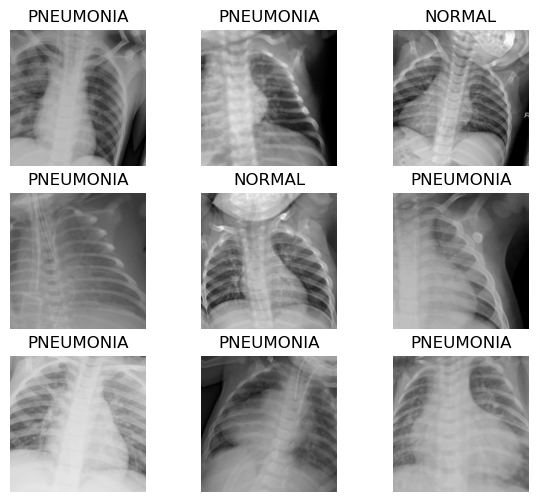

In [9]:
data.show_batch(nrows=3, figsize=(7,6))

## *Modélisation avec un modèle pré entrainer(resnet50) 

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('Path'),path = Path("chest_xray"))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


## *Visualisation 

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, 

AttributeError: 'Sequential' object has no attribute 'plot'

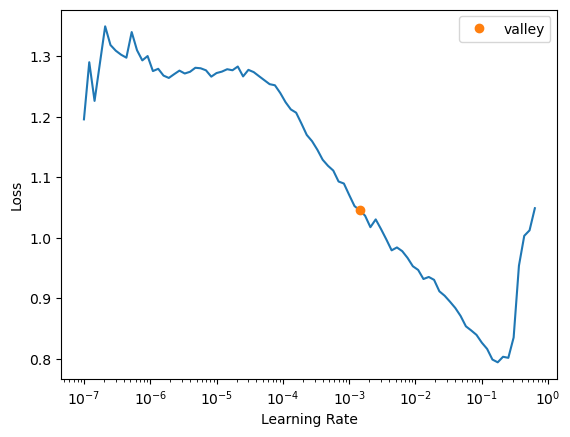

In [13]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.593897,2.165543,0.840734,1:01:53
1,0.308097,0.189749,0.957301,39:56
2,0.154407,0.112355,0.958582,38:49
3,0.125352,0.251555,0.957301,38:36


epoch,train_loss,valid_loss,accuracy,time
0,0.116420,0.166034,0.955167,41:03
1,0.163830,0.148877,0.944492,39:03
2,0.260290,0.215527,0.959863,38:41
3,0.252322,0.219022,0.961571,38:42
4,0.335697,1.974557,0.961571,40:39
5,0.298513,0.510585,0.954313,47:38
6,0.414260,0.286867,0.973527,46:43
7,0.203458,0.245118,0.970965,37:10
8,0.242088,0.550881,0.959436,38:47
9,0.191074,0.306364,0.968830,39:19


AttributeError: 'Sequential' object has no attribute 'plot'

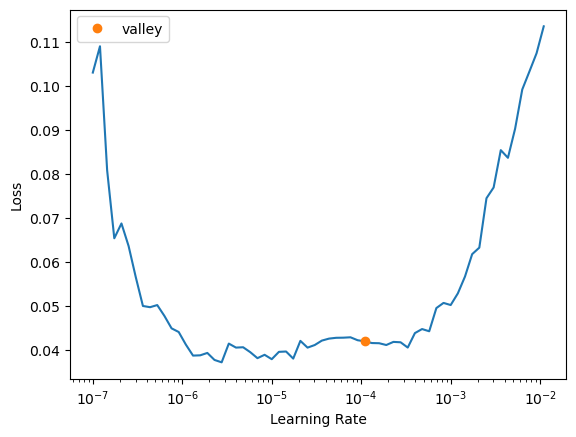

In [14]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

learn.recorder.plot_losses()

PNEUMONIA


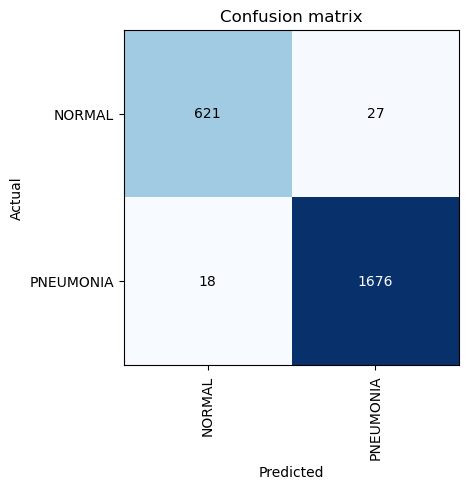

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
img=PILImage.create('person1000_virus_1681.jpeg')
print(learn.predict(img)[0])

In [22]:
learn.export("model.pkl")